# Prinsip Maksimum Pontryagin

In [ ]:
from IPython.display import display
import sympy as sp
from sympy.printing.mathml import mathml

In [ ]:
#Mendefinisikan Parameter dan Kompartemen yang Terlibat
#Variabel dan Kontrol
S, I, R, u1, u2, u3, u4  = sp.symbols("S, I, R, u1, u2, u3, u4", cls = sp.Function)
#Parameter
alpha, beta, mu1, mu2, gamma, sigma1, sigma2 = sp.symbols("alpha, beta, mu1, mu2, gamma, sigma1, sigma2")
A, C1, C2, C3,C4, t, J = sp.symbols("A, C1, C2, C3, C4, t, J")

t0 = 0
tf = 100

#Pendefinisian Fungsi Objektif
def obj():
  return A*I(t) + C1*u1(t)**2 + C2*u2(t)**2+ C3*u3(t)**2+C4*u4(t)**2

def dS():
  return (1-(1+u2(t))*sigma1)*mu1+ (1-(1+u3(t))*sigma2)*mu2 - (1-(1+u4(t))*alpha)*beta*S(t)*I(t) - (mu1+mu2)*S(t)
def dI():
  return (1 -(1+u4(t))*alpha)*(beta*S(t)*I(t)) - u1(t)*gamma*I(t) - (mu1+mu2)*I(t)
def dR():
  return (1+u2(t))*sigma1*mu1 +(1+u3(t))*sigma2*mu2+ u1(t)*gamma*I(t) - (mu1+mu2)*R(t)

display(sp.Eq(J, sp.Integral(obj(), (t, t0, tf))))
display(sp.Eq(S(t).diff(t), dS()))
display(sp.Eq(I(t).diff(t), dI()))
display(sp.Eq(R(t).diff(t), dR()))

Eq(J, Integral(A*I(t) + C1*u1(t)**2 + C2*u2(t)**2 + C3*u3(t)**2 + C4*u4(t)**2, (t, 0, 100)))

Eq(Derivative(S(t), t), -beta*(-alpha*(u4(t) + 1) + 1)*I(t)*S(t) + mu1*(-sigma1*(u2(t) + 1) + 1) + mu2*(-sigma2*(u3(t) + 1) + 1) - (mu1 + mu2)*S(t))

Eq(Derivative(I(t), t), beta*(-alpha*(u4(t) + 1) + 1)*I(t)*S(t) - gamma*I(t)*u1(t) - (mu1 + mu2)*I(t))

Eq(Derivative(R(t), t), gamma*I(t)*u1(t) + mu1*sigma1*(u2(t) + 1) + mu2*sigma2*(u3(t) + 1) - (mu1 + mu2)*R(t))

In [ ]:
#Membuat Fungsi Hamiltonian
LAMBDA1, LAMBDA2, LAMBDA3, Hamiltonian = sp.symbols("LAMBDA1, LAMBDA2, LAMBDA3, H", cls = sp.Function)
LAMBDA1diff, LAMBDA2diff, LAMBDA3diff = sp.symbols("LAMBDAdot_1, LAMBDAdot_2, LAMBDAdot_3")
display(sp.Eq(Hamiltonian(t), obj() + LAMBDA1(t)*dS() + LAMBDA2(t)*dI() + LAMBDA3(t)*dR()))

Hamiltonian = obj() + LAMBDA1(t)*dS() + LAMBDA2(t)*dI() + LAMBDA3(t)*dR()

Eq(H(t), A*I(t) + C1*u1(t)**2 + C2*u2(t)**2 + C3*u3(t)**2 + C4*u4(t)**2 + (beta*(-alpha*(u4(t) + 1) + 1)*I(t)*S(t) - gamma*I(t)*u1(t) - (mu1 + mu2)*I(t))*LAMBDA2(t) + (gamma*I(t)*u1(t) + mu1*sigma1*(u2(t) + 1) + mu2*sigma2*(u3(t) + 1) - (mu1 + mu2)*R(t))*LAMBDA3(t) + (-beta*(-alpha*(u4(t) + 1) + 1)*I(t)*S(t) + mu1*(-sigma1*(u2(t) + 1) + 1) + mu2*(-sigma2*(u3(t) + 1) + 1) - (mu1 + mu2)*S(t))*LAMBDA1(t))

In [ ]:
#Persamaan Adjoin
display(sp.Eq(LAMBDA1diff, -1*sp.diff(Hamiltonian, S(t))))
LAMBDA1diff = -1*sp.diff(Hamiltonian, S(t))
display(sp.Eq(LAMBDA2diff, -1*sp.diff(Hamiltonian, I(t))))
LAMBDA2diff = -1*sp.diff(Hamiltonian, I(t))
display(sp.Eq(LAMBDA3diff, -1*sp.diff(Hamiltonian, R(t))))
LAMBDA3diff = -1*sp.diff(Hamiltonian, R(t))

Eq(LAMBDAdot_1, -beta*(-alpha*(u4(t) + 1) + 1)*I(t)*LAMBDA2(t) - (-beta*(-alpha*(u4(t) + 1) + 1)*I(t) - mu1 - mu2)*LAMBDA1(t))

Eq(LAMBDAdot_2, -A + beta*(-alpha*(u4(t) + 1) + 1)*LAMBDA1(t)*S(t) - gamma*LAMBDA3(t)*u1(t) - (beta*(-alpha*(u4(t) + 1) + 1)*S(t) - gamma*u1(t) - mu1 - mu2)*LAMBDA2(t))

Eq(LAMBDAdot_3, -(-mu1 - mu2)*LAMBDA3(t))

In [ ]:
#Printing Persamaan Adjoin
print(LAMBDA1diff)
print(LAMBDA2diff)
print(LAMBDA3diff)

-beta*(-alpha*(u4(t) + 1) + 1)*I(t)*LAMBDA2(t) - (-beta*(-alpha*(u4(t) + 1) + 1)*I(t) - mu1 - mu2)*LAMBDA1(t)
-A + beta*(-alpha*(u4(t) + 1) + 1)*LAMBDA1(t)*S(t) - gamma*LAMBDA3(t)*u1(t) - (beta*(-alpha*(u4(t) + 1) + 1)*S(t) - gamma*u1(t) - mu1 - mu2)*LAMBDA2(t)
-(-mu1 - mu2)*LAMBDA3(t)


In [ ]:
display(sp.diff(sp.diff(Hamiltonian,u1(t)),u1(t)))
display(sp.diff(sp.diff(Hamiltonian,u2(t)),u2(t)))
display(sp.diff(sp.diff(Hamiltonian,u3(t)),u3(t)))
display(sp.diff(sp.diff(Hamiltonian,u4(t)),u4(t)))

2*C1

2*C2

2*C3

2*C4

In [ ]:
display(sp.diff(Hamiltonian,u1(t)))
display(sp.diff(Hamiltonian,u2(t)))
display(sp.diff(Hamiltonian,u3(t)))
display(sp.diff(Hamiltonian,u4(t)))

2*C1*u1(t) - gamma*I(t)*LAMBDA2(t) + gamma*I(t)*LAMBDA3(t)

2*C2*u2(t) - mu1*sigma1*LAMBDA1(t) + mu1*sigma1*LAMBDA3(t)

2*C3*u3(t) - mu2*sigma2*LAMBDA1(t) + mu2*sigma2*LAMBDA3(t)

2*C4*u4(t) + alpha*beta*I(t)*LAMBDA1(t)*S(t) - alpha*beta*I(t)*LAMBDA2(t)*S(t)

In [ ]:
display(sp.Eq(u1(t), sp.solve(sp.diff(Hamiltonian,u1(t)),u1(t))[0]))
display(sp.Eq(u2(t), sp.solve(sp.diff(Hamiltonian,u2(t)),u2(t))[0]))
display(sp.Eq(u3(t), sp.solve(sp.diff(Hamiltonian,u3(t)),u3(t))[0]))
display(sp.Eq(u4(t), sp.solve(sp.diff(Hamiltonian,u4(t)),u4(t))[0]))

Eq(u1(t), gamma*(LAMBDA2(t) - LAMBDA3(t))*I(t)/(2*C1))

Eq(u2(t), mu1*sigma1*(LAMBDA1(t) - LAMBDA3(t))/(2*C2))

Eq(u3(t), mu2*sigma2*(LAMBDA1(t) - LAMBDA3(t))/(2*C3))

Eq(u4(t), alpha*beta*(-LAMBDA1(t) + LAMBDA2(t))*I(t)*S(t)/(2*C4))

In [ ]:
print(sp.solve(sp.diff(Hamiltonian,u1(t)),u1(t))[0])
print(sp.solve(sp.diff(Hamiltonian,u2(t)),u2(t))[0])
print(sp.solve(sp.diff(Hamiltonian,u3(t)),u3(t))[0])
print(sp.solve(sp.diff(Hamiltonian,u4(t)),u4(t))[0])

gamma*(LAMBDA2(t) - LAMBDA3(t))*I(t)/(2*C1)
mu1*sigma1*(LAMBDA1(t) - LAMBDA3(t))/(2*C2)
mu2*sigma2*(LAMBDA1(t) - LAMBDA3(t))/(2*C3)
alpha*beta*(-LAMBDA1(t) + LAMBDA2(t))*I(t)*S(t)/(2*C4)


# Simulasi Numerik tanpa Kontrol

In [ ]:
import sys
sys.modules[__name__].__dict__.clear()
from scipy.integrate import odeint, RK45, solve_ivp #ODE Solver
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
#Model Parameter
alpha = 0.3
beta = 0.8
gamma = 0.03
mu1 = 0.4
mu2 = 0.15
sigma1 = 0.3
sigma2 = 0.3


InitS = 0.8
InitI = 0.2
InitR = 0

#Nilai Bobot Kontrol
A = 40
C1 = 1
C2 = 1
C3 = 1
C4 = 1

#Set up fOR Forward-Backward Sweep Method
test = -1 #Test variable; as long as variable is negative the while loops keeps repeating
t0 = 0 #Initial time
tf = 100 #Final time
deltaa = 0.00001 #Accepted tollerance
M = (10*tf)-1 #Number of nodes
t = np.linspace(t0,tf,M+1) #Time variable where linspace creates M+1 equally spaced nodes between t0 and tf, including t0 and tf.
h = tf/M #Spacing between nodes
h2 = h/2;

In [ ]:
#Kondisi Awal Model
S = np.zeros((1, M+1), dtype = float)[0]
I = np.zeros((1, M+1), dtype = float)[0]
R = np.zeros((1, M+1), dtype = float)[0]

S[0] = InitS
I[0] = InitI
R[0] = InitR

loopcnt = 0 #Menghitung Jumlah Looping
for lp in range (M):

  oldS = S;
  oldI = I;
  oldR = R;

  #Model
  for i in range (0,M):
    m11 = (1-sigma1)*mu1+ (1-sigma2)*mu2 - (1-alpha)*beta*S[i]*I[i] - (mu1+mu2)*S[i]
    m12 = (1-alpha)*(beta*S[i]*I[i])-gamma * I[i]- (mu1+mu2)*I[i]
    m13 = sigma1*mu1 + sigma2*mu2+ gamma*I[i] - (mu1+mu2)*R[i]

    S[i+1] = S[i] + h*m11
    I[i+1] = I[i] + h*m12
    R[i+1] = R[i] + h*m13

  S0 = S
  I0 = I
  R0 = R

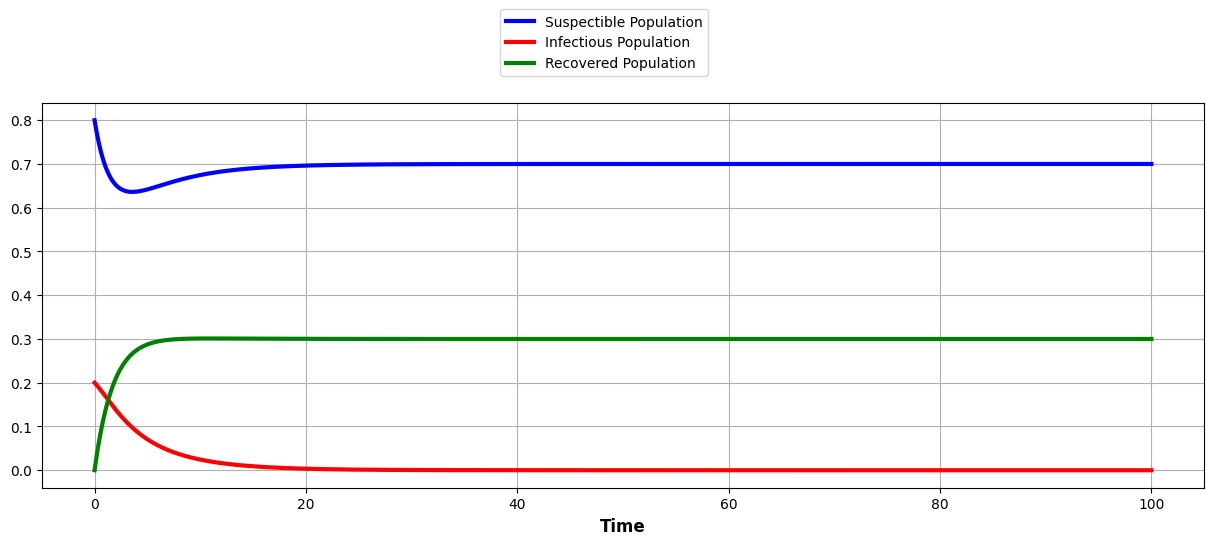

In [ ]:
from matplotlib.ticker import MaxNLocator

plt.figure(figsize = (15,5))
plt.plot(t, S0, color = 'blue', ls = '-', label = 'Suspectible Population', linewidth = 3)
plt.plot(t, I0, color = 'red', ls = '-', label = 'Infectious Population', linewidth = 3)
plt.plot(t, R0, color = 'green', ls = '-', label = 'Recovered Population', linewidth = 3)
plt.xlabel('Time', fontweight = 'bold', fontsize=12)
plt.legend(bbox_to_anchor=(0.5, 1), loc='center', bbox_transform=plt.gcf().transFigure)
plt.grid()
plt.show()

# Simulasi Numerik dengan Kontrol

In [ ]:
#Kondisi Awal Model
S = np.zeros((1, M+1), dtype = float)[0]
I = np.zeros((1, M+1), dtype = float)[0]
R = np.zeros((1, M+1), dtype = float)[0]

S[0] = InitS
I[0] = InitI
R[0] = InitR

#Kondisi Awal Input Kontrol Optimal
u1 = np.zeros((1, M+1), dtype = float)[0]
u2 = np.zeros((1, M+1), dtype = float)[0]
u3 = np.zeros((1, M+1), dtype = float)[0]
u4 = np.zeros((1, M+1), dtype = float)[0]

#Kondisi Awal Fungsi Adjoin
LAMBDA1 = np.zeros((1, M+1), dtype = float)[0]
LAMBDA2 = np.zeros((1, M+1), dtype = float)[0]
LAMBDA3 = np.zeros((1, M+1), dtype = float)[0]

LAMBDA1[M] = 0
LAMBDA2[M] = 0
LAMBDA3[M] = 0

#Metode Sweep Maju-Mundur
for loop in range(M):

  oldu1 = u1;
  oldu2 = u2;
  oldu3 = u3;
  oldu4 = u4;

  oldS = S;
  oldI = I;
  oldR = R;

  oldLAMBDA1 = LAMBDA1;
  oldLAMBDA2 = LAMBDA2;
  oldLAMBDA3 = LAMBDA3;

  #Model
  for i in range (0,M):

    m11 = (1-(1+u2[i])*sigma1)*mu1+ (1-(1+u3[i])*sigma2)*mu2- (1-(1+u4[i])*alpha)*beta*S[i]*I[i] - (mu1+mu2)*S[i]
    m12 = (1 -(1+u4[i])*alpha)*(beta*S[i]*I[i]) - u1[i]*gamma*I[i] - (mu1+mu2)*I[i]
    m13 = (1+u2[i])*sigma1*mu1 +(1+u3[i])*sigma2*mu2+ u1[i]*gamma*I[i] - (mu1+mu2)*R[i]

    S[i+1] = S[i] + h*m11
    I[i+1] = I[i] + h*m12
    R[i+1] = R[i] + h+m13

  #Persamaan Adjoin
  for i in range (0,M):
    j = M - i;

    n11 = -beta*(-alpha*(u4[j]+1)+1)*I[j]*LAMBDA2[j] - (-beta*(-alpha*(u4[j] + 1) + 1)*I[j] - mu1 - mu2)*LAMBDA1[j]
    n12 = -A + beta*(-alpha*(u4[j] + 1) + 1)*LAMBDA1[j]*S[j] - gamma*LAMBDA3[j]*u1[j] - (beta*(-alpha*(u4[j] + 1)+1) *S[j] - gamma*u1[j] - mu1 - mu2)*LAMBDA2[j]
    n13 = -(-mu1 - mu2)*LAMBDA3[j]

    LAMBDA1[j-1] = LAMBDA1[j] - h*n11
    LAMBDA2[j-1] = LAMBDA2[j] - h*n12
    LAMBDA3[j-1] = LAMBDA3[j] - h*n13

  #Kondisi Optimal
  for k in range (0,M):

    u1[k] = min(2, max(1, gamma*(LAMBDA2[k] - LAMBDA3[k])*I[k] /(2*C1)))
    u2[k] = min(1, max(0, mu1*sigma1*(LAMBDA1[k] - LAMBDA3[k])/(2*C2)))
    u3[k] = min(1, max(0, mu2*sigma2*(LAMBDA1[k] - LAMBDA3[k])/(2*C3)))
    u4[k] = min(1, max(0, alpha*beta*(-LAMBDA1[k] + LAMBDA2[k])*I[k]*S[k]/(2*C4)))

  #Cek Konvergensi Solusi
  tempu1 = deltaa*sum(abs(u1)) - sum(abs(oldu1 - u1))
  tempu2 = deltaa*sum(abs(u2)) - sum(abs(oldu1 - u2))
  tempu3 = deltaa*sum(abs(u3)) - sum(abs(oldu1 - u3))
  tempu4 = deltaa*sum(abs(u4)) - sum(abs(oldu1 - u4))

  tempS = deltaa*sum(abs(S)) - sum(abs(oldS - S))
  tempI = deltaa*sum(abs(I)) - sum(abs(oldI - I))
  tempR = deltaa*sum(abs(R)) - sum(abs(oldR - R))

  tempLAMBDA1 = deltaa*sum(abs(LAMBDA1)) - sum(abs(oldLAMBDA1 - LAMBDA1))
  tempLAMBDA2 = deltaa*sum(abs(LAMBDA2)) - sum(abs(oldLAMBDA2 - LAMBDA2))
  tempLAMBDA3 = deltaa*sum(abs(LAMBDA3)) - sum(abs(oldLAMBDA3 - LAMBDA3))

  test = min(tempu1, tempu2, tempu3, tempu4, tempS, tempI, tempR, tempLAMBDA1, tempLAMBDA2, tempLAMBDA3)

S1 = S
I1 = I
R1 = R

# Perhitungan fungsi objektif
J = 0
for i in range(M):
    J += A * I[i] + C1 * u1[i]**2 + C2 * u2[i]**2 + C3 * u3[i]**2 + C4 * u4[i]**2

# Menyertakan langkah waktu h dalam integrasi numerik
J *= h

print(f'Nilai fungsi objektif J: {J}')

Nilai fungsi objektif J: 129.05772641963415


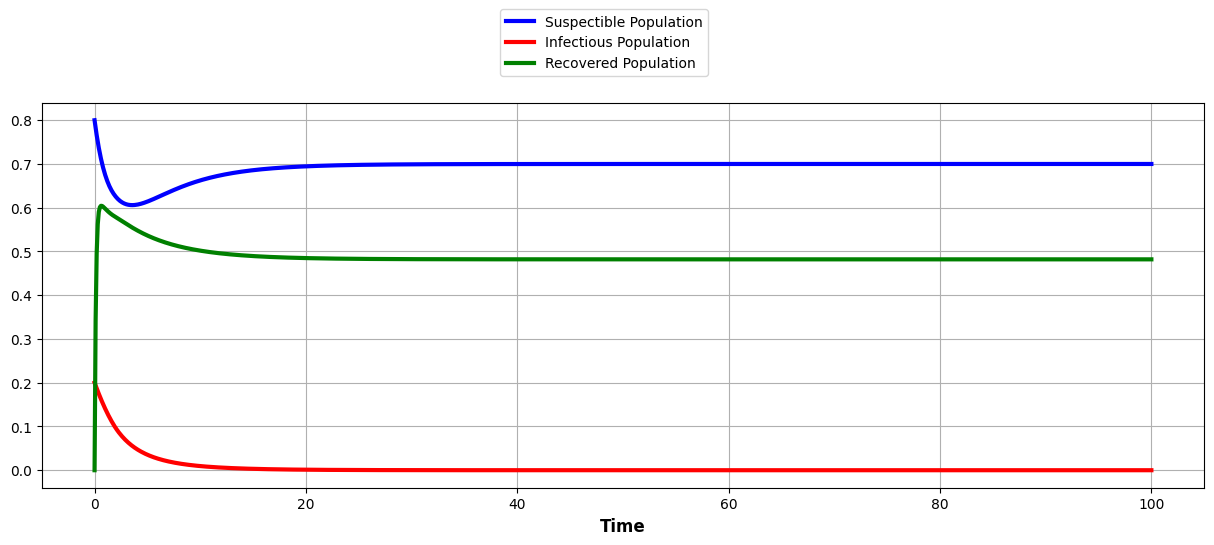

In [ ]:
from matplotlib.ticker import MaxNLocator

plt.figure(figsize = (15,5))
plt.plot(t, S1, color = 'blue', ls = '-', label = 'Suspectible Population', linewidth = 3)
plt.plot(t, I1, color = 'red', ls = '-', label = 'Infectious Population', linewidth = 3)
plt.plot(t, R1, color = 'green', ls = '-', label = 'Recovered Population', linewidth = 3)
plt.xlabel('Time', fontweight = 'bold', fontsize=12)
plt.legend(bbox_to_anchor=(0.5, 1), loc='center', bbox_transform=plt.gcf().transFigure)
plt.grid()
plt.show()

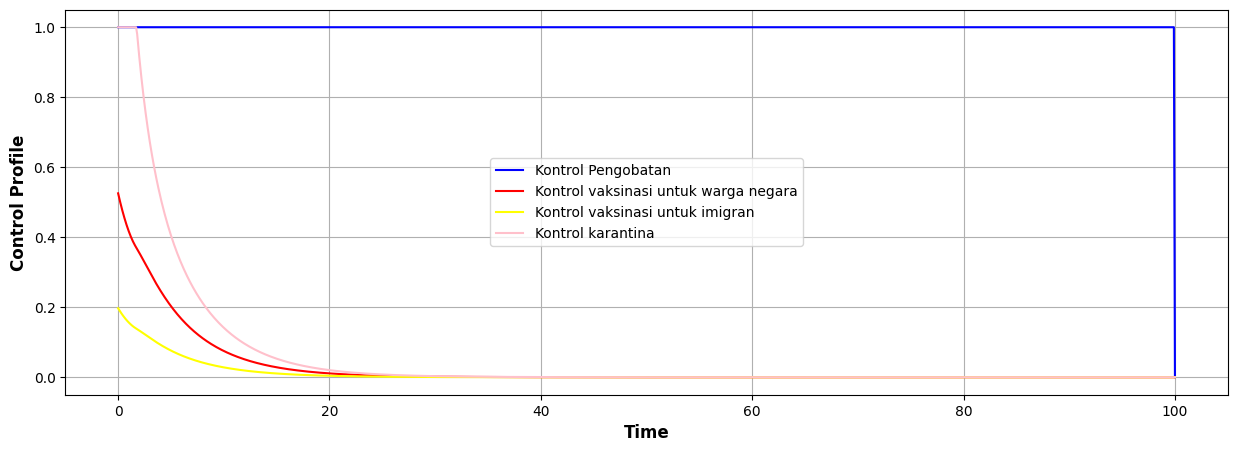

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(t, u1, color='blue', ls='-', label='Kontrol Pengobatan')
plt.plot(t, u2, color='red', ls='-', label='Kontrol vaksinasi untuk warga negara')
plt.plot(t, u3, color='yellow', ls='-', label='Kontrol vaksinasi untuk imigran')
plt.plot(t, u4, color='pink', ls='-', label='Kontrol karantina')
plt.xlabel('Time', fontweight='bold', fontsize=12)
plt.ylabel('Control Profile', fontweight='bold', fontsize=12)
plt.legend()
plt.grid()
plt.show()

# Perbandingan Kontrol dan Tanpa Kontrol


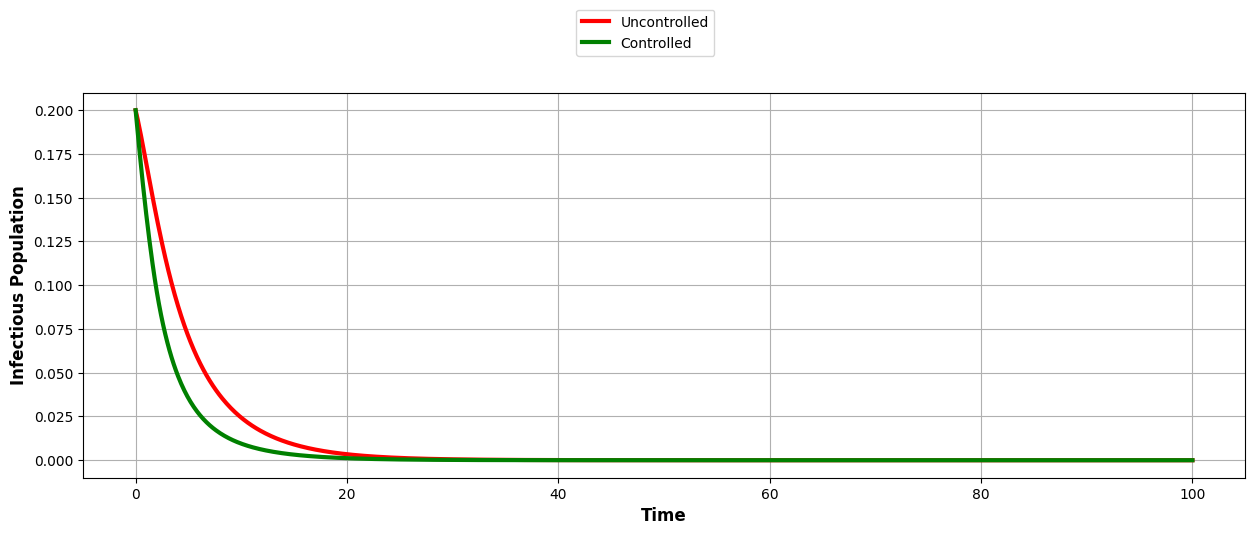

In [ ]:
# Perbandingan Kontrol dan Tanpa Kontrol
from matplotlib.ticker import MaxNLocator

plt.figure(figsize = (15,5))
plt.plot(t, I0, color = 'red', ls = '-', label = 'Uncontrolled', linewidth = 3)
plt.plot(t, I1, color = 'green', ls = '-', label = 'Controlled', linewidth = 3)
plt.xlabel('Time', fontweight = 'bold', fontsize=12)
plt.ylabel('Infectious Population', fontweight = 'bold', fontsize=12)
plt.legend(bbox_to_anchor=(0.5, 1), loc='center', bbox_transform=plt.gcf().transFigure)
plt.grid()
plt.show()

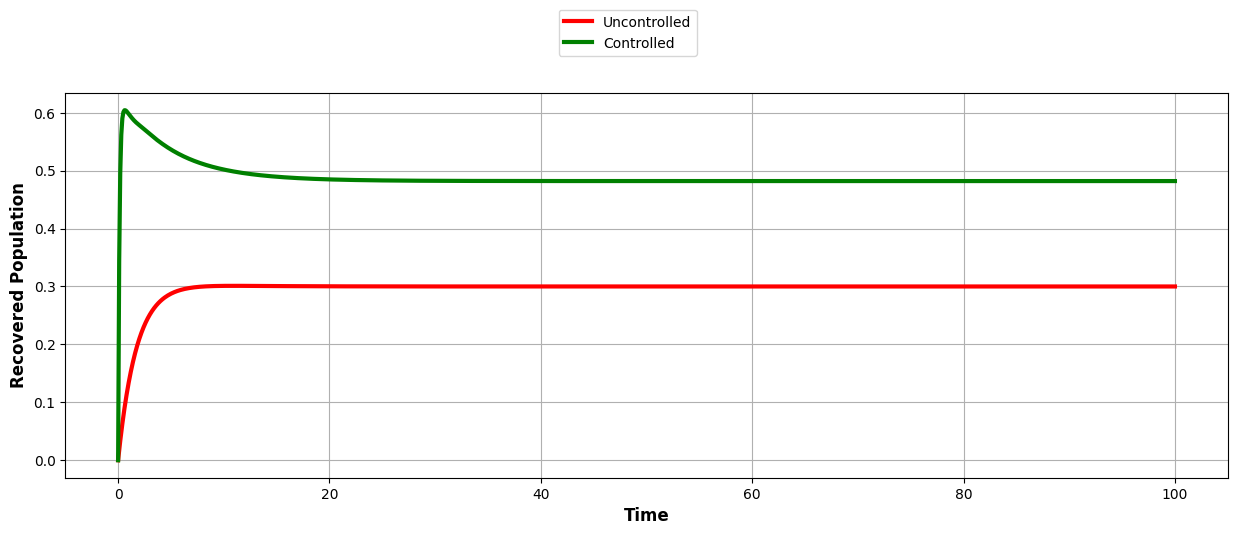

In [ ]:
from matplotlib.ticker import MaxNLocator

plt.figure(figsize = (15,5))
plt.plot(t, R0, color = 'red', ls = '-', label = 'Uncontrolled', linewidth = 3)
plt.plot(t, R1, color = 'green', ls = '-', label = 'Controlled', linewidth = 3)
plt.xlabel('Time', fontweight = 'bold', fontsize=12)
plt.ylabel('Recovered Population', fontweight = 'bold', fontsize=12)
plt.legend(bbox_to_anchor=(0.5, 1), loc='center', bbox_transform=plt.gcf().transFigure)
plt.grid()
plt.show()

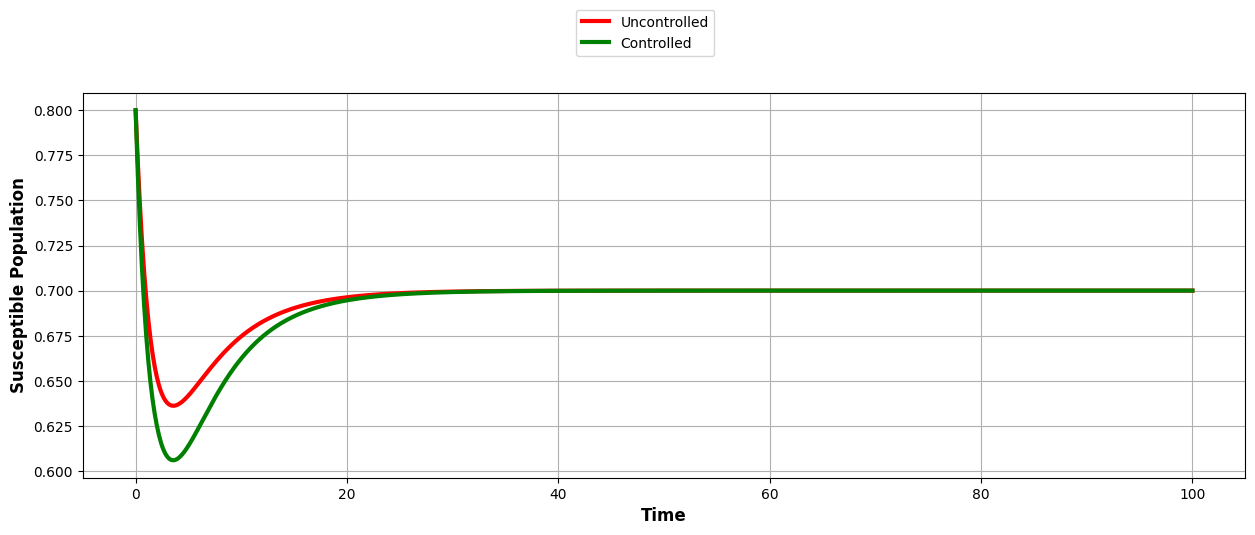

In [ ]:
from matplotlib.ticker import MaxNLocator

plt.figure(figsize = (15,5))
plt.plot(t, S0, color = 'red', ls = '-', label = 'Uncontrolled', linewidth = 3)
plt.plot(t, S1, color = 'green', ls = '-', label = 'Controlled', linewidth = 3)
plt.xlabel('Time', fontweight = 'bold', fontsize=12)
plt.ylabel('Susceptible Population', fontweight = 'bold', fontsize=12)
plt.legend(bbox_to_anchor=(0.5, 1), loc='center', bbox_transform=plt.gcf().transFigure)
plt.grid()
plt.show()

# Simulasi Numerik dengan Kontrol tanpa Karantina

In [ ]:
#Kondisi Awal Model
S = np.zeros((1, M+1), dtype = float)[0]
I = np.zeros((1, M+1), dtype = float)[0]
R = np.zeros((1, M+1), dtype = float)[0]

S[0] = InitS
I[0] = InitI
R[0] = InitR

#Kondisi Awal Input Kontrol Optimal
u1 = np.zeros((1, M+1), dtype = float)[0]
u2 = np.zeros((1, M+1), dtype = float)[0]
u3 = np.zeros((1, M+1), dtype = float)[0]
u4 = np.zeros((1, M+1), dtype = float)[0]

#Kondisi Awal Fungsi Adjoin
LAMBDA1 = np.zeros((1, M+1), dtype = float)[0]
LAMBDA2 = np.zeros((1, M+1), dtype = float)[0]
LAMBDA3 = np.zeros((1, M+1), dtype = float)[0]

LAMBDA1[M] = 0
LAMBDA2[M] = 0
LAMBDA3[M] = 0

#Metode Sweep Maju-Mundur
for loop in range(M):

  oldu1 = u1;
  oldu2 = u2;
  oldu3 = u3;
  oldu4 = u4;

  oldS = S;
  oldI = I;
  oldR = R;

  oldLAMBDA1 = LAMBDA1;
  oldLAMBDA2 = LAMBDA2;
  oldLAMBDA3 = LAMBDA3;

  #Model
  for i in range (0,M):

    m11 = (1-(1+u2[i])*sigma1)*mu1+ (1-(1+u3[i])*sigma2)*mu2- (1-(1+u4[i])*alpha)*beta*S[i]*I[i] - (mu1+mu2)*S[i]
    m12 = (1 -(1+u4[i])*alpha)*(beta*S[i]*I[i]) - u1[i]*gamma*I[i] - (mu1+mu2)*I[i]
    m13 = (1+u2[i])*sigma1*mu1 +(1+u3[i])*sigma2*mu2+ u1[i]*gamma*I[i] - (mu1+mu2)*R[i]

    S[i+1] = S[i] + h*m11
    I[i+1] = I[i] + h*m12
    R[i+1] = R[i] + h+m13

  #Persamaan Adjoin
  for i in range (0,M):
    j = M - i;

    n11 = -beta*(-alpha*(u4[j]+1)+1)*I[j]*LAMBDA2[j] - (-beta*(-alpha*(u4[j] + 1) + 1)*I[j] - mu1 - mu2)*LAMBDA1[j]
    n12 = -A + beta*(-alpha*(u4[j] + 1) + 1)*LAMBDA1[j]*S[j] - gamma*LAMBDA3[j]*u1[j] - (beta*(-alpha*(u4[j] + 1)+1) *S[j] - gamma*u1[j] - mu1 - mu2)*LAMBDA2[j]
    n13 = -(-mu1 - mu2)*LAMBDA3[j]

    LAMBDA1[j-1] = LAMBDA1[j] - h*n11
    LAMBDA2[j-1] = LAMBDA2[j] - h*n12
    LAMBDA3[j-1] = LAMBDA3[j] - h*n13

  #Kondisi Optimal
  for k in range (0,M):

    u1[k] = min(2, max(1, gamma*(LAMBDA2[k] - LAMBDA3[k])*I[k] /(2*C1)))
    u2[k] = min(1, max(0, mu1*sigma1*(LAMBDA1[k] - LAMBDA3[k])/(2*C2)))
    u3[k] = min(1, max(0, mu2*sigma2*(LAMBDA1[k] - LAMBDA3[k])/(2*C3)))
    u4[k] = min(0, 0)

  #Cek Konvergensi Solusi
  tempu1 = deltaa*sum(abs(u1)) - sum(abs(oldu1 - u1))
  tempu2 = deltaa*sum(abs(u2)) - sum(abs(oldu1 - u2))
  tempu3 = deltaa*sum(abs(u3)) - sum(abs(oldu1 - u3))
  tempu4 = deltaa*sum(abs(u4)) - sum(abs(oldu1 - u4))

  tempS = deltaa*sum(abs(S)) - sum(abs(oldS - S))
  tempI = deltaa*sum(abs(I)) - sum(abs(oldI - I))
  tempR = deltaa*sum(abs(R)) - sum(abs(oldR - R))

  tempLAMBDA1 = deltaa*sum(abs(LAMBDA1)) - sum(abs(oldLAMBDA1 - LAMBDA1))
  tempLAMBDA2 = deltaa*sum(abs(LAMBDA2)) - sum(abs(oldLAMBDA2 - LAMBDA2))
  tempLAMBDA3 = deltaa*sum(abs(LAMBDA3)) - sum(abs(oldLAMBDA3 - LAMBDA3))

  test = min(tempu1, tempu2, tempu3, tempu4, tempS, tempI, tempR, tempLAMBDA1, tempLAMBDA2, tempLAMBDA3)

S1 = S
I1 = I
R1 = R

# Perhitungan fungsi objektif
J_t = 0
for i in range(M):
    J_t += A * I[i] + C1 * u1[i]**2 + C2 * u2[i]**2 + C3 * u3[i]**2 + C4 * u4[i]**2

# Menyertakan langkah waktu h dalam integrasi numerik
J_t *= h

print(f'Nilai fungsi objektif J: {J_t}')

Nilai fungsi objektif J: 135.21872010131884


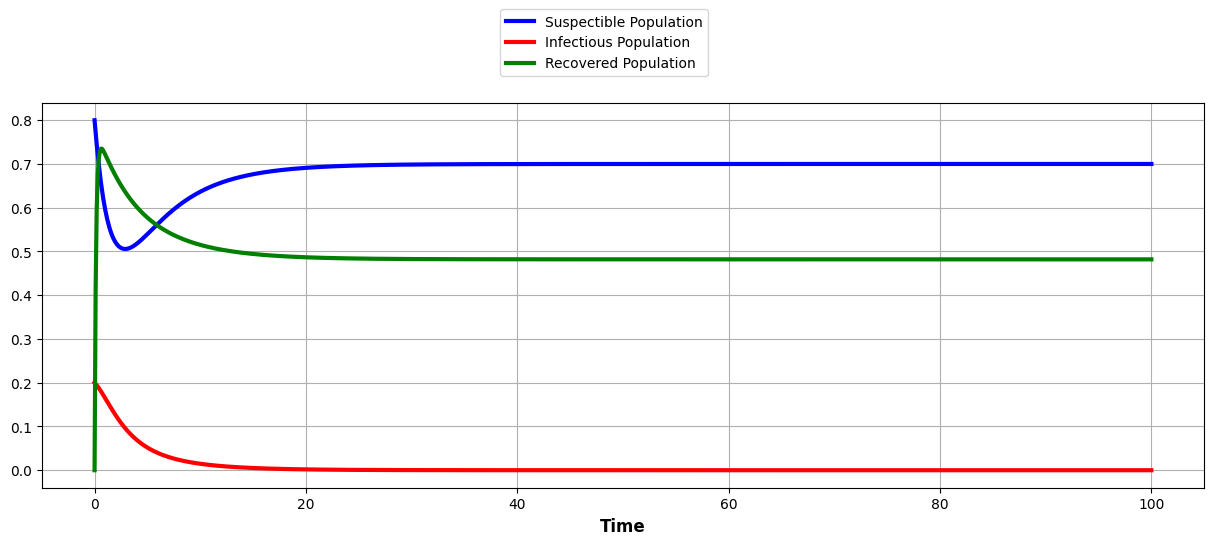

In [ ]:
from matplotlib.ticker import MaxNLocator

plt.figure(figsize = (15,5))
plt.plot(t, S1, color = 'blue', ls = '-', label = 'Suspectible Population', linewidth = 3)
plt.plot(t, I1, color = 'red', ls = '-', label = 'Infectious Population', linewidth = 3)
plt.plot(t, R1, color = 'green', ls = '-', label = 'Recovered Population', linewidth = 3)
plt.xlabel('Time', fontweight = 'bold', fontsize=12)
plt.legend(bbox_to_anchor=(0.5, 1), loc='center', bbox_transform=plt.gcf().transFigure)
plt.grid()
plt.show()

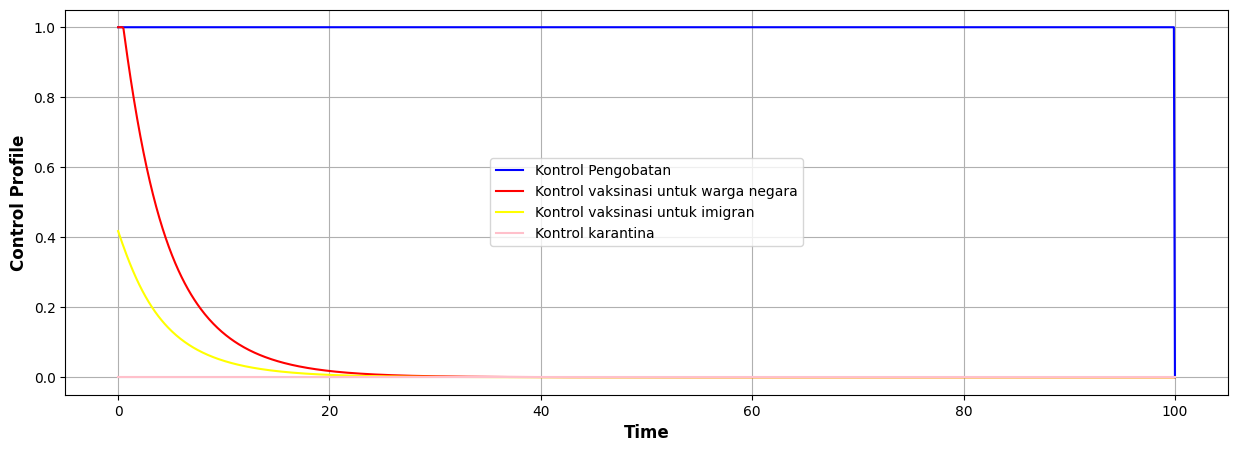

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(t, u1, color='blue', ls='-', label='Kontrol Pengobatan')
plt.plot(t, u2, color='red', ls='-', label='Kontrol vaksinasi untuk warga negara')
plt.plot(t, u3, color='yellow', ls='-', label='Kontrol vaksinasi untuk imigran')
plt.plot(t, u4, color='pink', ls='-', label='Kontrol karantina')
plt.xlabel('Time', fontweight='bold', fontsize=12)
plt.ylabel('Control Profile', fontweight='bold', fontsize=12)
plt.legend()
plt.grid()
plt.show()

# Perbandingan Tanpa Kontrol dengan 3 Kontrol Tanpa Karantina


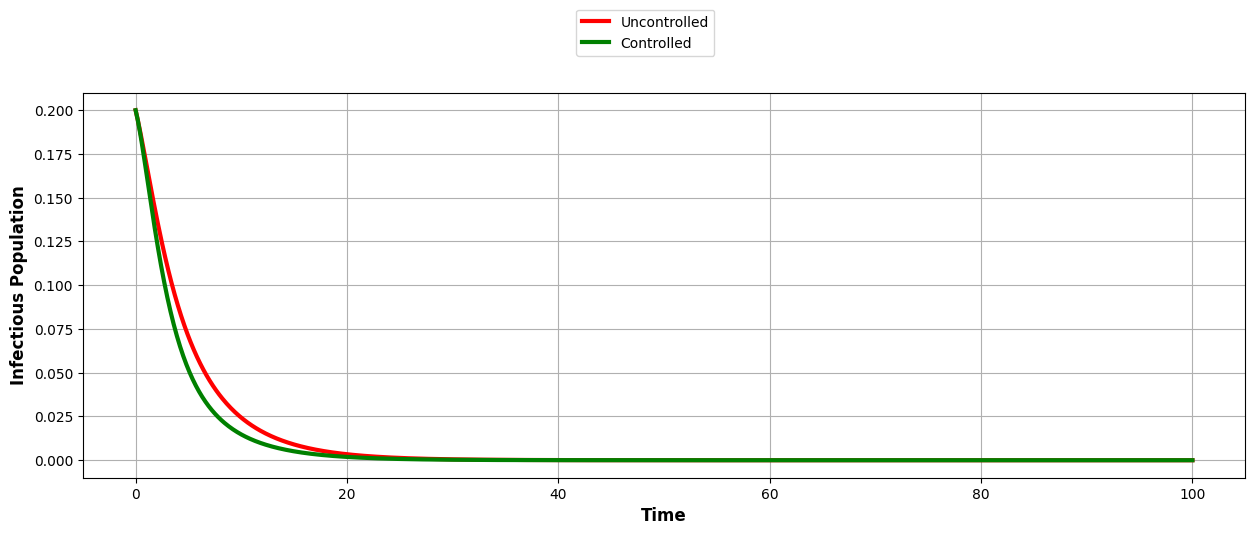

In [ ]:
from matplotlib.ticker import MaxNLocator

plt.figure(figsize = (15,5))
plt.plot(t, I0, color = 'red', ls = '-', label = 'Uncontrolled', linewidth = 3)
plt.plot(t, I1, color = 'green', ls = '-', label = 'Controlled', linewidth = 3)
plt.xlabel('Time', fontweight = 'bold', fontsize=12)
plt.ylabel('Infectious Population', fontweight = 'bold', fontsize=12)
plt.legend(bbox_to_anchor=(0.5, 1), loc='center', bbox_transform=plt.gcf().transFigure)
plt.grid()
plt.show()

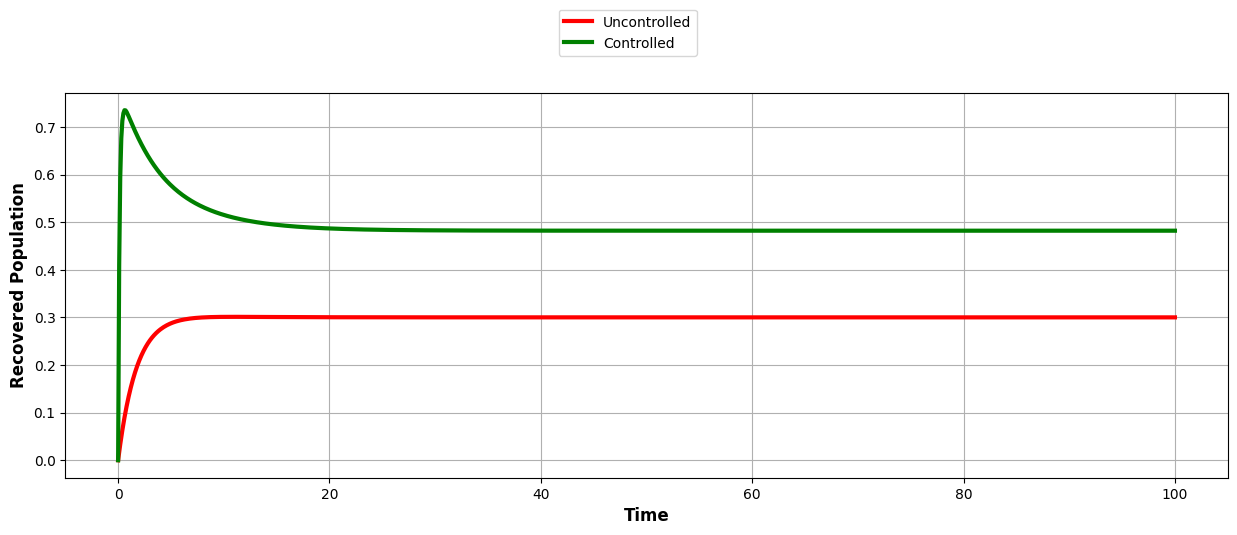

In [ ]:
from matplotlib.ticker import MaxNLocator

plt.figure(figsize = (15,5))
plt.plot(t, R0, color = 'red', ls = '-', label = 'Uncontrolled', linewidth = 3)
plt.plot(t, R1, color = 'green', ls = '-', label = 'Controlled', linewidth = 3)
plt.xlabel('Time', fontweight = 'bold', fontsize=12)
plt.ylabel('Recovered Population', fontweight = 'bold', fontsize=12)
plt.legend(bbox_to_anchor=(0.5, 1), loc='center', bbox_transform=plt.gcf().transFigure)
plt.grid()
plt.show()

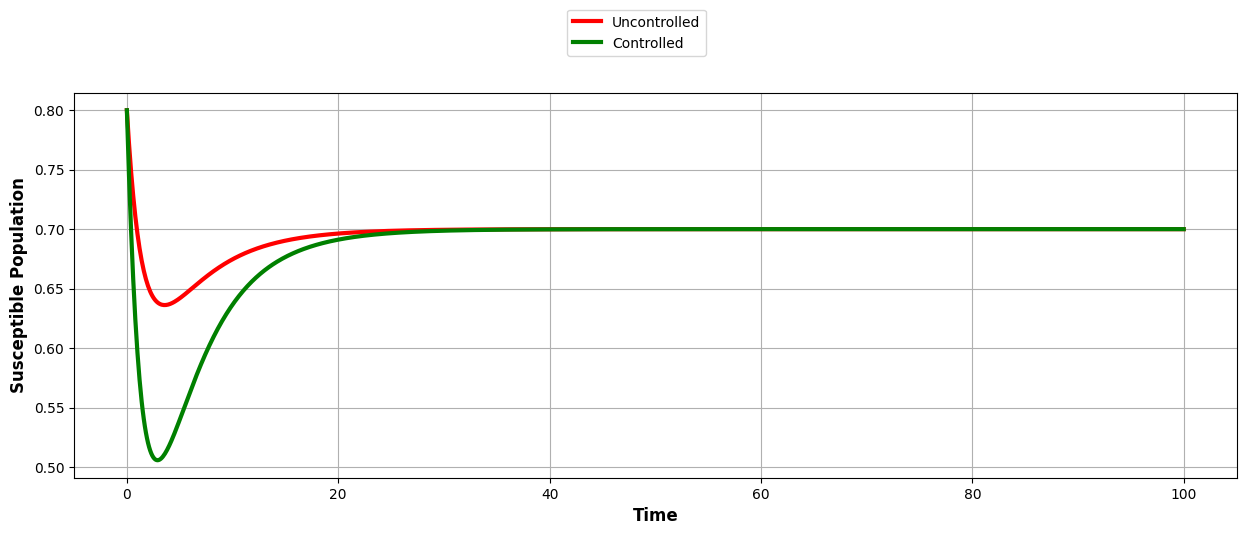

In [ ]:
from matplotlib.ticker import MaxNLocator

plt.figure(figsize = (15,5))
plt.plot(t, S0, color = 'red', ls = '-', label = 'Uncontrolled', linewidth = 3)
plt.plot(t, S1, color = 'green', ls = '-', label = 'Controlled', linewidth = 3)
plt.xlabel('Time', fontweight = 'bold', fontsize=12)
plt.ylabel('Susceptible Population', fontweight = 'bold', fontsize=12)
plt.legend(bbox_to_anchor=(0.5, 1), loc='center', bbox_transform=plt.gcf().transFigure)
plt.grid()
plt.show()